In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc

In [2]:
data = pd.read_csv('./online_shoppers_intention.csv')

# The Meaning of the attributes

Administrative: This attribute contains information about the number of administrative pages (e.g., contact us, about us) that the user visited during the session.

Administrative_Duration: Represents the total time spent by the user on administrative pages during the session.

Informational: This attribute records the number of informational pages (e.g., product details, FAQs) that the user visited during the session.

Informational_Duration: Represents the total time spent by the user on informational pages during the session.

ProductRelated: Indicates the number of product-related pages (e.g., product listings, product categories) that the user visited during the session.

ProductRelated_Duration: Represents the total time spent by the user on product-related pages during the session.

Bounce Rate: The percentage of visitors who enter the website and leave without further interaction.

Exit Rate: The percentage of visitors who leave the website from a specific page.

Page Value: Represents the average value of a page that a user visited before completing an e-commerce transaction.

SpecialDay: Indicates the closeness of the specific session to a special day (e.g., Valentine's Day, Black Friday).

Month: Represents the month in which the session occurred.

OperatingSystem: The operating system used by the user.

Browser: The web browser used by the user.

Region: The geographic region of the user.

TrafficType: The type of traffic source that brought the user to the website (e.g., search engine, direct, referral).

VisitorType: Indicates whether the user is a new visitor, returning visitor, or other visitor types.

Weekend: A binary attribute indicating whether the session occurred on the weekend.

Revenue: The target variable that indicates whether the user made a purchase (1) or not (0).

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [4]:
column_names = data.columns

In [5]:
column_names

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [6]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

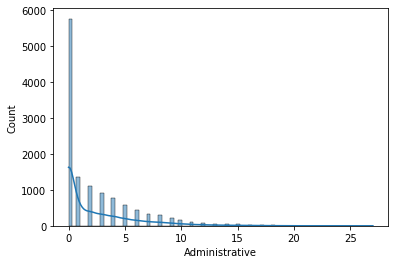

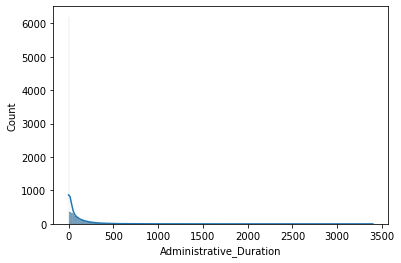

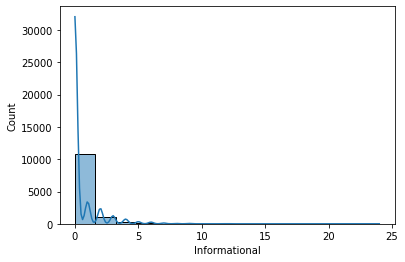

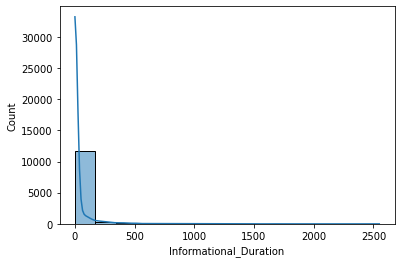

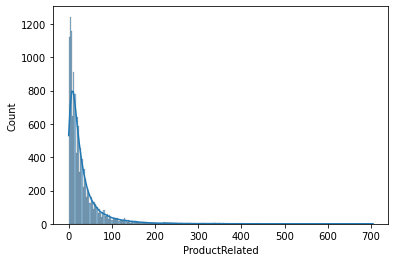

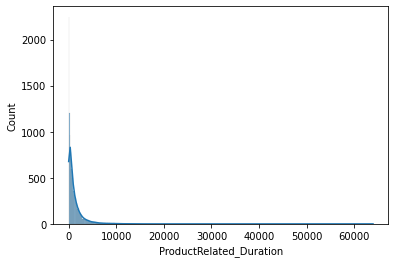

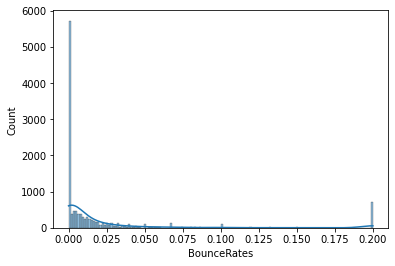

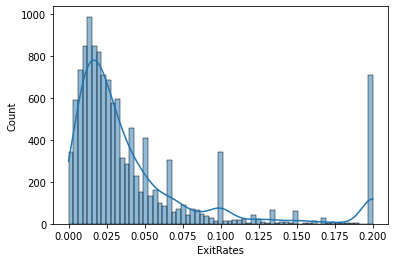

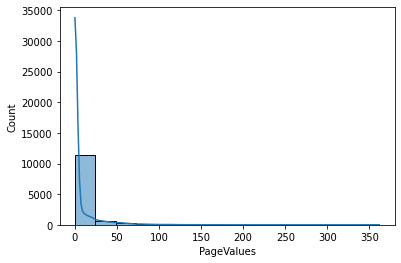

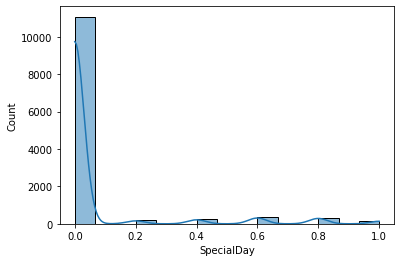

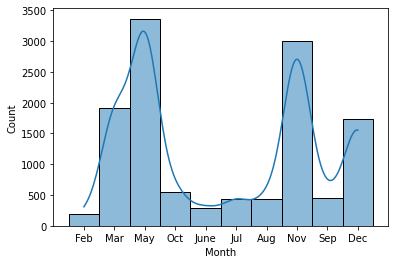

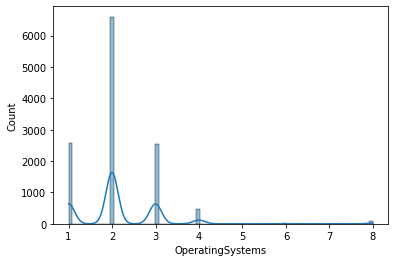

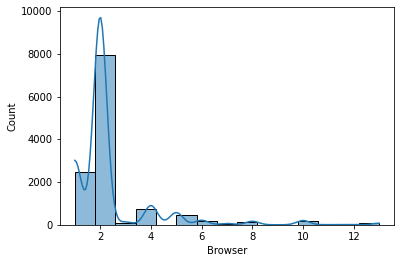

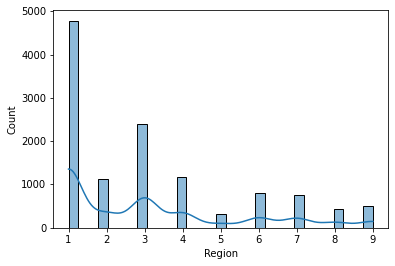

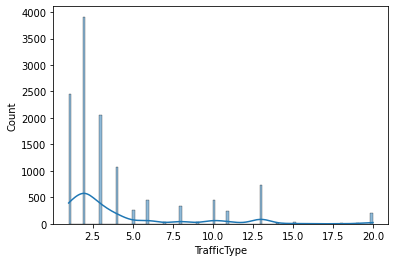

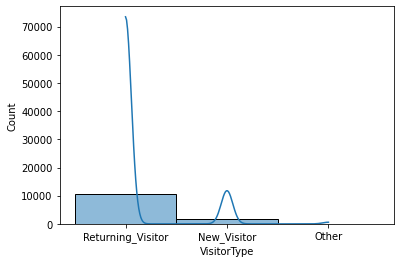

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


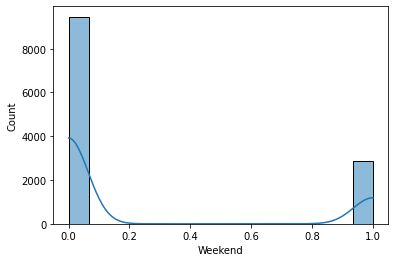

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


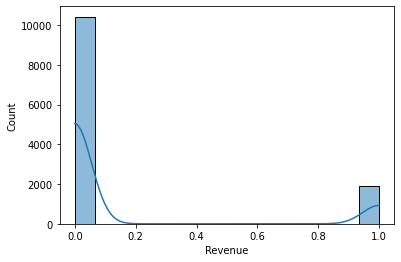

In [7]:
for i in range(len(column_names)):
    if column_names.dtype == 'int64':
        sns.histplot(data[column_names[i]])
    else:
        sns.histplot(data[column_names[i]], kde=True)
    plt.show()

<AxesSubplot:xlabel='Month'>

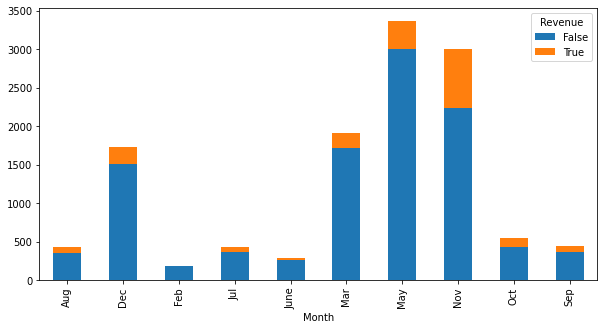

In [8]:
data.groupby('Month')['Revenue'].value_counts().unstack('Revenue').plot(kind='bar', stacked=True, figsize=(10, 5))

In [9]:
data.groupby('Month')['PageValues']

Text(0.5, 1.0, 'Page Values by Month and Revenue')

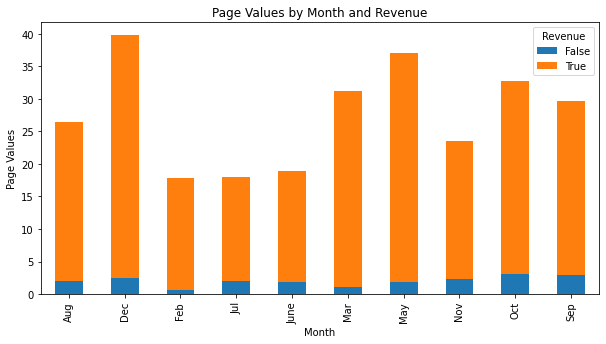

In [10]:
grouped_data = data.groupby(['Month', 'Revenue'])['PageValues'].mean().reset_index()

# Pivot the data to have Revenue as columns and Month as index
pivot_data = grouped_data.pivot(index='Month', columns='Revenue', values='PageValues')

# Plot the data
fig, ax = plt.subplots(figsize=(10, 5))
pivot_data.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Month')
ax.set_ylabel('Page Values')
ax.set_title('Page Values by Month and Revenue')

<AxesSubplot:xlabel='Weekend'>

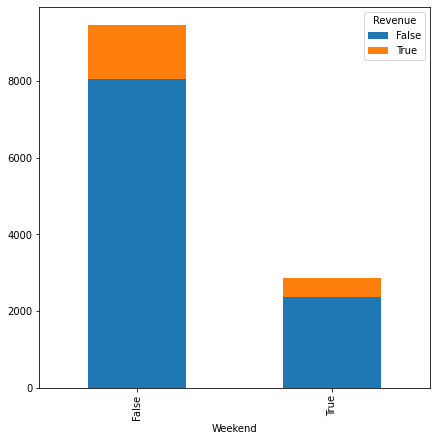

In [11]:
data.groupby('Weekend')['Revenue'].value_counts().unstack('Revenue').plot(kind='bar', stacked=True, figsize=(7, 7))

<AxesSubplot:ylabel='count'>

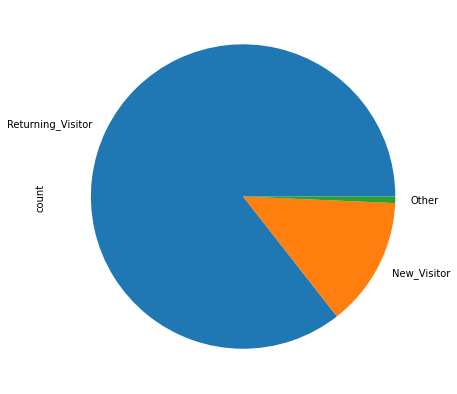

In [12]:
data['VisitorType'].value_counts().plot.pie(y='VisitorType', figsize=(7, 7))

<AxesSubplot:>

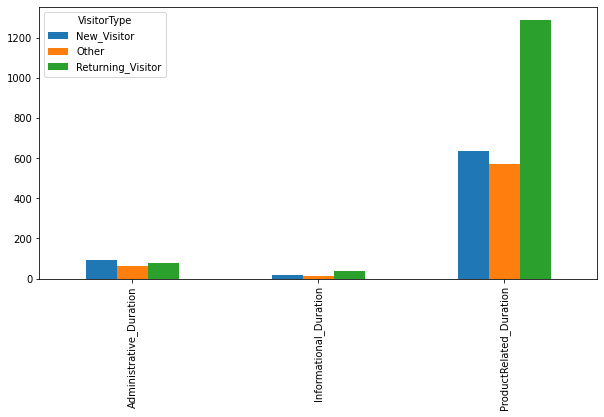

In [13]:
df_pvt=data[['Administrative_Duration','Informational_Duration','ProductRelated_Duration','VisitorType']]
pd.pivot_table(df_pvt, values=['Administrative_Duration','Informational_Duration','ProductRelated_Duration'],columns=['VisitorType'], aggfunc='mean').plot(kind='bar', figsize=(10, 5))

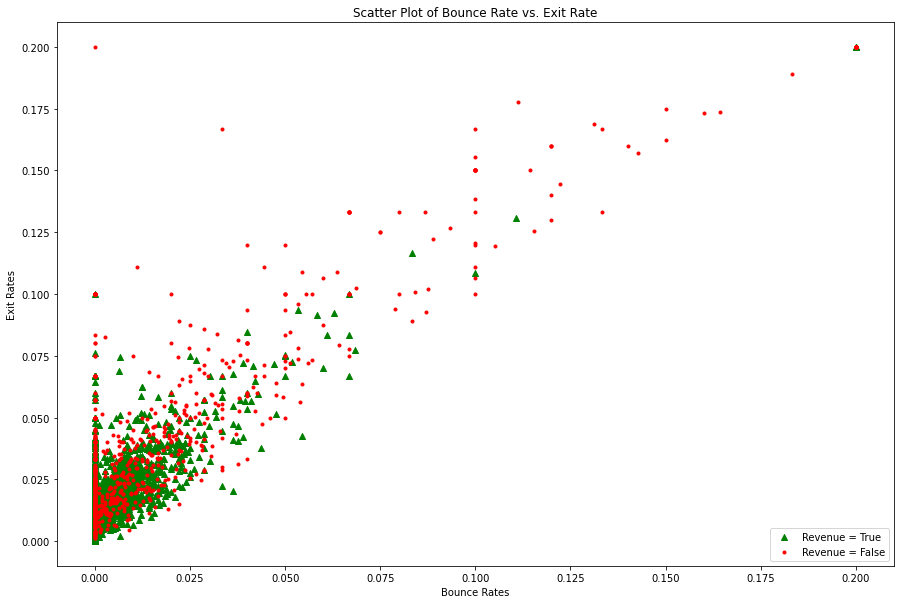

In [14]:
revenue_true = data[data['Revenue'] == True]
revenue_false = data[data['Revenue'] == False][2000:2800]


plt.figure(figsize=(15, 10))
plt.scatter(revenue_true['BounceRates'], revenue_true['ExitRates'], color='green', label='Revenue = True', marker='^')
plt.scatter(revenue_false['BounceRates'], revenue_false['ExitRates'], color='red', label='Revenue = False', marker='.')

# Set labels and title
plt.xlabel('Bounce Rates')
plt.ylabel('Exit Rates')
plt.title('Scatter Plot of Bounce Rate vs. Exit Rate')
plt.legend()

Counting the Number of duplicates

In [15]:
data.duplicated().value_counts()

False    12205
True       125
Name: count, dtype: int64

In [16]:
data.shape

(12330, 18)

In [17]:
data[data.duplicated()]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
158,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
178,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
418,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,1,1,1,1,Returning_Visitor,True,False
456,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,4,1,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11934,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,2,New_Visitor,False,False
11938,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,4,1,Returning_Visitor,True,False
12159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,3,Returning_Visitor,False,False
12180,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,13,9,20,Returning_Visitor,False,False


In [18]:
data = data.drop_duplicates()

In [19]:
data.duplicated().value_counts()

False    12205
Name: count, dtype: int64

In [20]:
column_names

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [21]:
data["PageValues"].min(), data["PageValues"].max()

(0.0, 361.7637419)

In [22]:
Month={'Jan':1, 'Feb':2, 'Mar':3, 'May':5, 'Oct':10, 'June':6, 'Jul':7, 'Aug':8, 'Nov':11, 'Sep':9,'Dec':12}
data["Month"] = data["Month"].map(Month)

C:\Users\user\AppData\Local\Temp\ipykernel_18560\3505245031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Month"] = data["Month"].map(Month)


In [23]:
data["VisitorType"].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [24]:
VisitorType = {"Returning_Visitor" : 1, "New_Visitor" : 2, "Other": 3}
data["VisitorType"] = data["VisitorType"].map(VisitorType)

C:\Users\user\AppData\Local\Temp\ipykernel_18560\630515660.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["VisitorType"] = data["VisitorType"].map(VisitorType)


In [25]:
data["VisitorType"].unique()

array([1, 2, 3], dtype=int64)

In [26]:
bool2val = {True : 1, False: 0}
data["Weekend"] = data["Weekend"].map(bool2val)
data["Revenue"] = data["Revenue"].map(bool2val)

C:\Users\user\AppData\Local\Temp\ipykernel_18560\3512150430.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Weekend"] = data["Weekend"].map(bool2val)
C:\Users\user\AppData\Local\Temp\ipykernel_18560\3512150430.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Revenue"] = data["Revenue"].map(bool2val)


<AxesSubplot:>

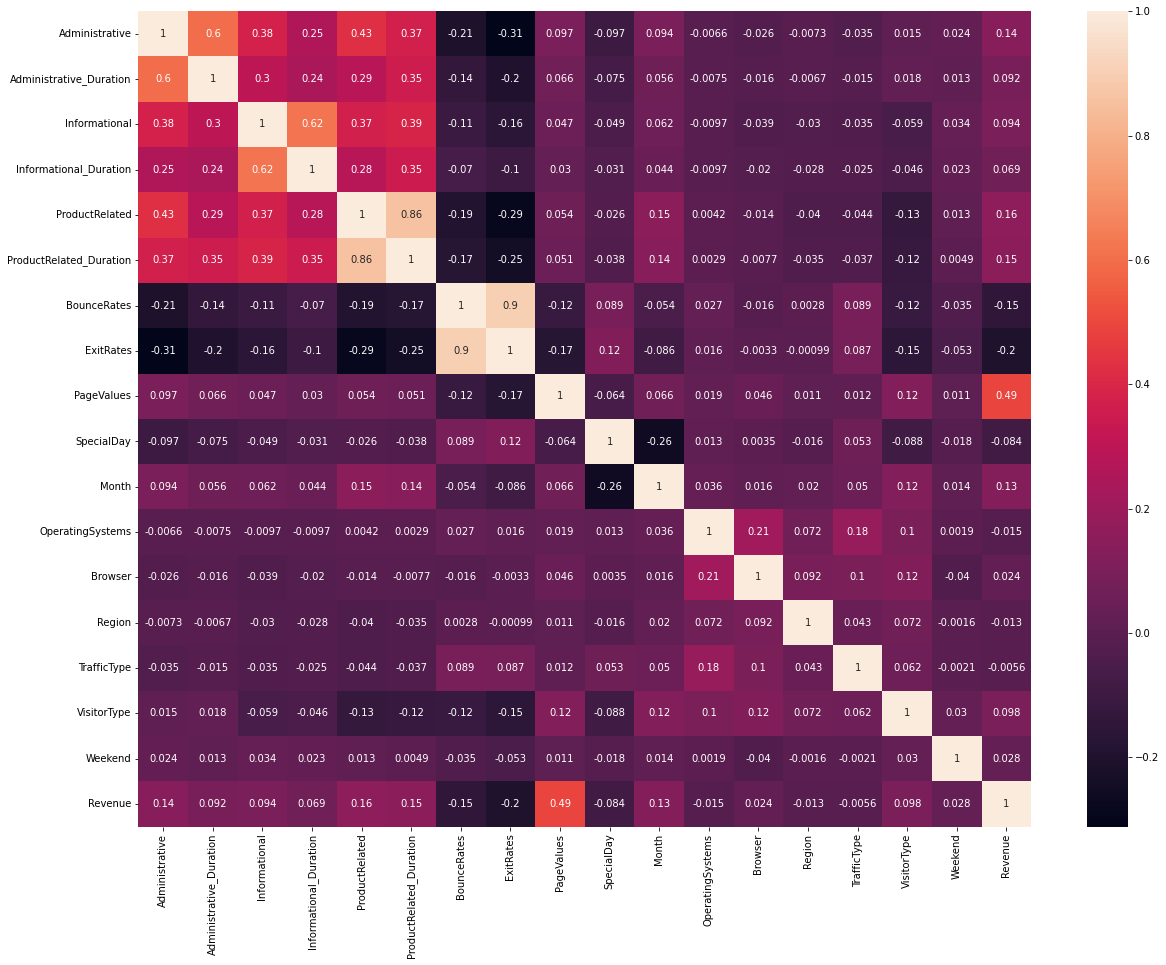

In [27]:
corr_mat = data.corr()
fig, ax = plt.subplots(figsize=(20,15))  
sns.heatmap(corr_mat, xticklabels=corr_mat.columns, yticklabels=corr_mat.columns, annot=True)

In [28]:
value = corr_mat.iloc[-1,:-1]

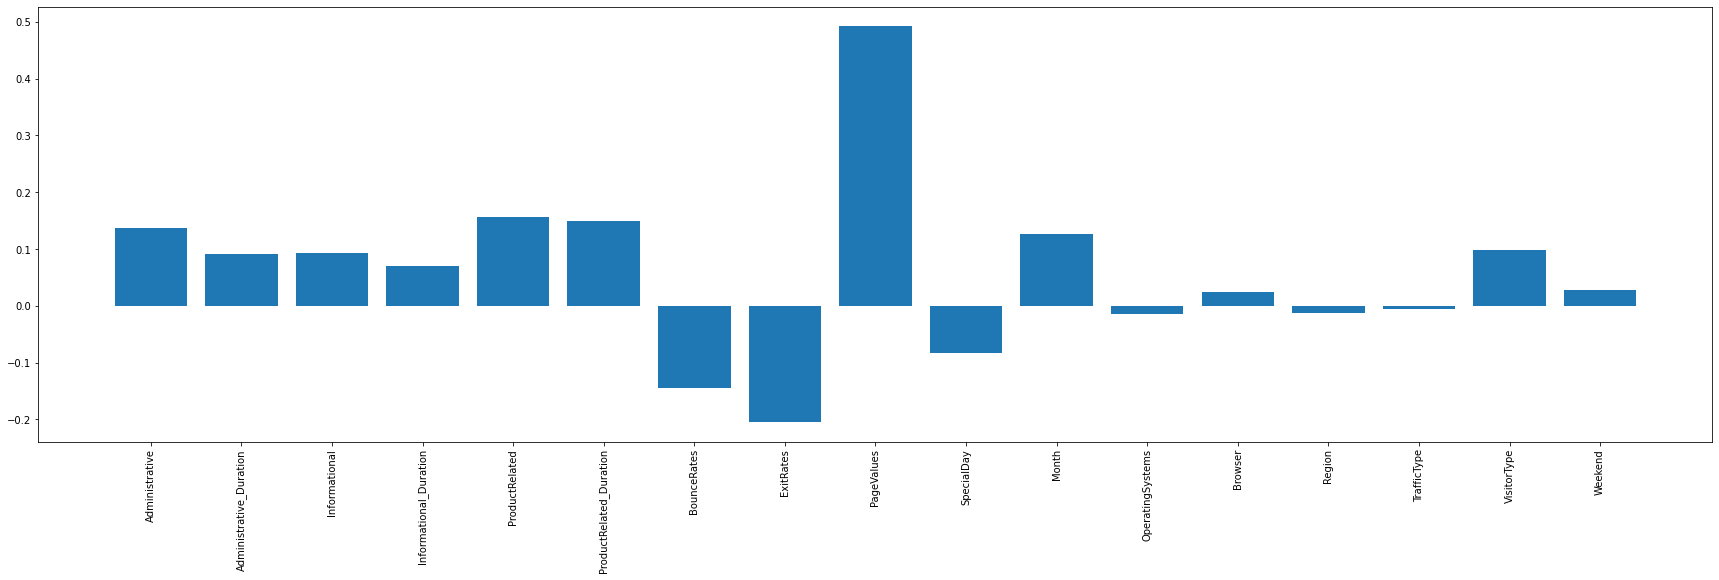

In [29]:
fig, ax = plt.subplots(figsize=(30,8))  
plt.bar(column_names[:-1],value)
plt.xticks(rotation=90)
plt.rcParams.update({'font.size': 24})

In [30]:
from sklearn.preprocessing import StandardScaler 
  
scaler = StandardScaler() 
  
scaler.fit(data.drop('Revenue', axis = 1)) 
scaled_features = scaler.transform(data.drop('Revenue', axis = 1)) 
  
df_feat = pd.DataFrame(scaled_features, columns = data.columns[:-1]) 
df_feat.head() 

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,3.969402,3.434394,-0.318962,-0.31024,-1.673504,-1.239776,-0.794017,-0.896370,-0.765321,-0.403104,-0.553088
1,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.595451,-0.450137,1.268054,-0.318962,-0.31024,-1.673504,-0.136980,-0.209237,-0.896370,-0.516347,-0.403104,-0.553088
2,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,3.969402,3.434394,-0.318962,-0.31024,-1.673504,2.068612,-0.794017,2.433853,-0.267374,-0.403104,-0.553088
3,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.627404,0.654748,2.134590,-0.318962,-0.31024,-1.673504,0.965816,-0.209237,-0.480092,-0.018400,-0.403104,-0.553088
4,-0.702302,-0.460019,-0.398824,-0.246257,-0.494387,-0.301889,-0.008183,0.184884,-0.318962,-0.31024,-1.673504,0.965816,0.375543,-0.896370,-0.018400,-0.403104,1.808031


In [31]:
# data_x = data.iloc[:, :-1]
data_x =  scaled_features

In [32]:
# data_y = data.iloc[:, -1]
data_y = data["Revenue"]

In [33]:
data.shape

(12205, 18)

In [34]:
data_x.shape

(12205, 17)

In [35]:
train_x , test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2, random_state=20)

In [36]:
train_x

array([[ 0.49879066,  0.70252304, -0.3988242 , ..., -0.51634748,
        -0.40310412,  1.80803074],
       [-0.70230237, -0.46001931, -0.3988242 , ..., -0.51634748,
        -0.40310412, -0.55308794],
       [ 2.30043021,  6.42733982, -0.3988242 , ..., -0.51634748,
        -0.40310412, -0.55308794],
       ...,
       [ 2.00015695,  0.82572624,  0.38514252, ...,  3.96517816,
        -0.40310412, -0.55308794],
       [-0.70230237, -0.46001931,  0.38514252, ...,  3.96517816,
        -0.40310412, -0.55308794],
       [-0.70230237, -0.46001931, -0.3988242 , ..., -0.76532112,
        -0.40310412, -0.55308794]])

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knn = KNeighborsClassifier()
knn.fit(train_x, train_y)

KNeighborsClassifier()

In [40]:
report = classification_report(test_y, knn.predict(test_x), digits=4)

In [41]:
print(report)

              precision    recall  f1-score   support

           0     0.8891    0.9632    0.9247      2065
           1     0.6275    0.3404    0.4414       376

    accuracy                         0.8673      2441
   macro avg     0.7583    0.6518    0.6830      2441
weighted avg     0.8488    0.8673    0.8502      2441



In [42]:
cm = confusion_matrix(test_y, knn.predict(test_x))

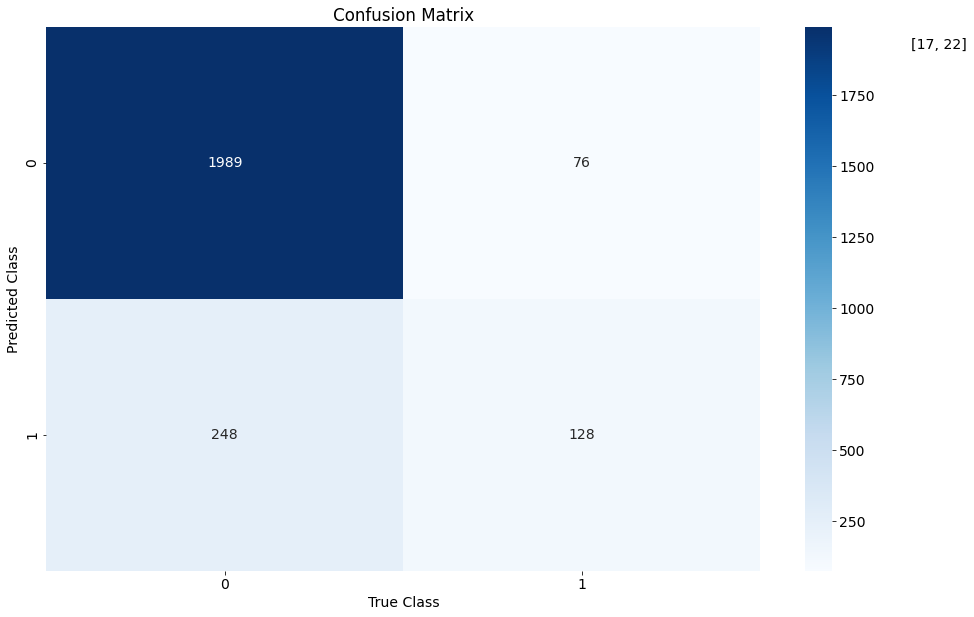

In [45]:
plt.figure(figsize=(16, 10))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True, fmt="", cmap='Blues',annot_kws={"fontsize": 14})
plt.xlabel('True Class')
plt.ylabel('Predicted Class')
plt.title("Confusion Matrix")
plt.figtext(0.9,0.85,'[17, 22]',ha='center',fontsize=14)
plt.rcParams.update({'font.size': 14})

In [46]:
parameters = {
    'n_neighbors' : range(1, 40),
    'weights' : ['uniform', 'distance'],
    'metric' : ['minkowski','euclidean','manhattan']
}

In [47]:
knn_clf = KNeighborsClassifier()
gscv = GridSearchCV(knn_clf, param_grid=parameters, scoring="accuracy", cv=5)
gscv.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': range(1, 40),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [48]:
print(gscv.best_params_)

{'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'distance'}


In [49]:
knn_best = KNeighborsClassifier(n_neighbors = 9, weights='distance', metric='minkowski')
knn_best.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=9, weights='distance')

In [50]:
report_best = classification_report(test_y, knn.predict(test_x), digits=4)

In [51]:
print(report_best)

              precision    recall  f1-score   support

           0     0.8891    0.9632    0.9247      2065
           1     0.6275    0.3404    0.4414       376

    accuracy                         0.8673      2441
   macro avg     0.7583    0.6518    0.6830      2441
weighted avg     0.8488    0.8673    0.8502      2441



In [54]:
results = gscv.cv_results_

# Retrieve hyperparameters and corresponding accuracy scores
hyperparameters = results['params']
mean_test_scores = results['mean_test_score']

In [60]:
np.argmax(mean_test_scores)
hyperparameters[17]

{'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'distance'}

In [61]:
score = []
k_values = []
for i in range(1, 200, 2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x, train_y)
    k_values.append(i)
    accuracy = accuracy_score(test_y, knn.predict(test_x))
    score.append(accuracy)

In [62]:
score

[0.8418680868496518,
 0.8639901679639492,
 0.8672675133142155,
 0.8758705448586644,
 0.8775092175337976,
 0.8799672265464973,
 0.8803768947152806,
 0.8799672265464973,
 0.8787382220401475,
 0.8775092175337976,
 0.8779188857025809,
 0.8758705448586644,
 0.8754608766898812,
 0.8770995493650143,
 0.8750512085210979,
 0.8750512085210979,
 0.8754608766898812,
 0.8746415403523147,
 0.8746415403523147,
 0.8742318721835314,
 0.8742318721835314,
 0.8734125358459648,
 0.8734125358459648,
 0.8734125358459648,
 0.8734125358459648,
 0.8730028676771815,
 0.8730028676771815,
 0.8717738631708316,
 0.8721835313396149,
 0.8713641950020483,
 0.870954526833265,
 0.8705448586644817,
 0.8713641950020483,
 0.870954526833265,
 0.8713641950020483,
 0.8725931995083982,
 0.8717738631708316,
 0.8717738631708316,
 0.8713641950020483,
 0.8713641950020483,
 0.8717738631708316,
 0.870954526833265,
 0.8701351904956984,
 0.8697255223269152,
 0.869315854158132,
 0.8701351904956984,
 0.8697255223269152,
 0.86931585415813

Text(0, 0.5, 'Accuracy Scores')

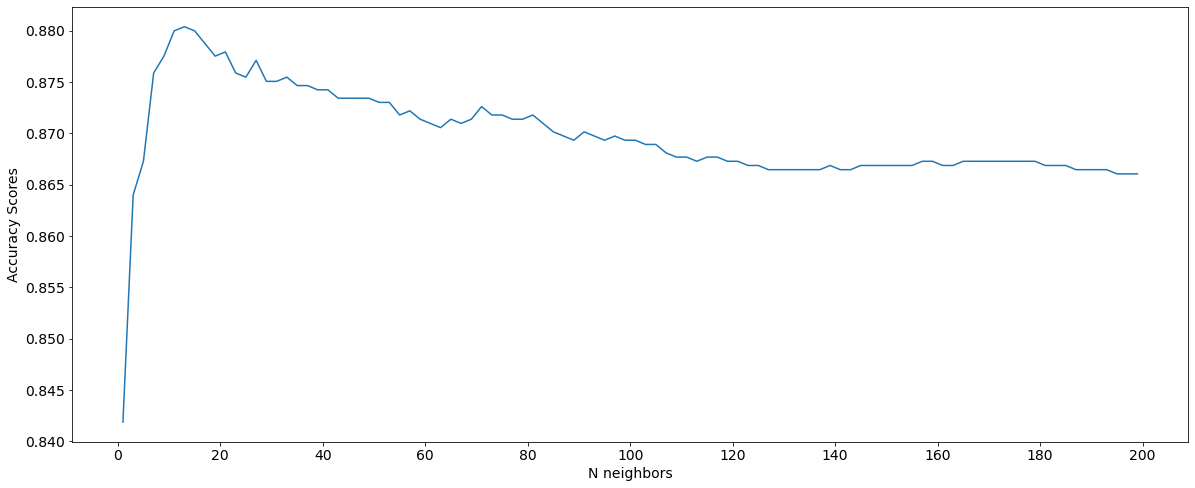

In [63]:
fig, ax = plt.subplots(figsize=(20,8))  
plt.rcParams.update({'font.size': 14})

plt.plot(k_values, score)
plt.xticks(np.arange(min(k_values)-1, max(k_values) + 20,20))
plt.xlabel("N neighbors")
plt.ylabel("Accuracy Scores")

In [91]:
knn1 = KNeighborsClassifier(n_neighbors=15)
knn1.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=15)

In [92]:
report = classification_report(test_y, knn1.predict(test_x), digits=4)

In [93]:
print(report)

              precision    recall  f1-score   support

           0     0.8849    0.9864    0.9329      2065
           1     0.7986    0.2952    0.4311       376

    accuracy                         0.8800      2441
   macro avg     0.8417    0.6408    0.6820      2441
weighted avg     0.8716    0.8800    0.8556      2441



In [94]:
column_names

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [95]:
y_probabilities = knn.predict_proba(test_x)[:, 1]

In [96]:
fpr, tpr, thresholds = roc_curve(test_y, y_probabilities)

In [97]:
roc_auc = auc(fpr, tpr)

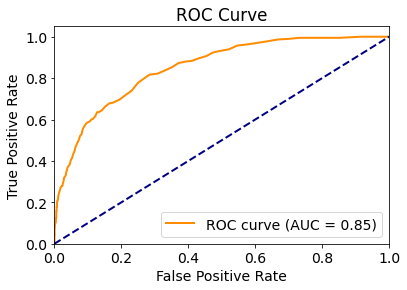

In [98]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()